# Research Project

##### All code used in this document has been sourced from Python documentation, previous modules and the Image and Text Processing for Data Science module.
##### The following code is used to convert into a binary class dataset
mansoor9743 (2024). Fake-News-Detection/code/Fake_news_detection.ipynb at master · mansoor9743/Fake-News-Detection. [online] GitHub. Available at: https://github.com/mansoor9743/Fake-News-Detection/blob/master/code/Fake_news_detection.ipynb [Accessed 8 Aug. 2024].

‌

## Data Collection

In [1]:
import pandas as pd

# Loading the TSV file into a DataFrame
df = pd.read_csv("C:\\Users\\KHADIJA ALTAF\\Downloads\\liar_dataset\\train.tsv", sep='\t')

# Displaying the first few rows of the DataFrame
print(df.head())


    2635.json        false  \
0  10540.json    half-true   
1    324.json  mostly-true   
2   1123.json        false   
3   9028.json    half-true   
4  12465.json         true   

  Says the Annies List political group supports third-trimester abortions on demand.  \
0  When did the decline of coal start? It started...                                   
1  Hillary Clinton agrees with John McCain "by vo...                                   
2  Health care reform legislation is likely to ma...                                   
3  The economic turnaround started at the end of ...                                   
4  The Chicago Bears have had more starting quart...                                   

                             abortion    dwayne-bohac  \
0  energy,history,job-accomplishments  scott-surovell   
1                      foreign-policy    barack-obama   
2                         health-care    blog-posting   
3                        economy,jobs   charlie-crist   
4    

In [2]:
# Assigning column names to the dataframe
df.columns = ['ID', 'Label', 'Statement', 'Subject', 'Speaker', 'Job Title', 
              'State', 'Party', 'Barely True Counts', 'False Counts', 'Half True Counts', 
              'Mostly True Counts', 'Pants on Fire Counts', 'Context']
print(df.head())

           ID        Label                                          Statement  \
0  10540.json    half-true  When did the decline of coal start? It started...   
1    324.json  mostly-true  Hillary Clinton agrees with John McCain "by vo...   
2   1123.json        false  Health care reform legislation is likely to ma...   
3   9028.json    half-true  The economic turnaround started at the end of ...   
4  12465.json         true  The Chicago Bears have had more starting quart...   

                              Subject         Speaker  \
0  energy,history,job-accomplishments  scott-surovell   
1                      foreign-policy    barack-obama   
2                         health-care    blog-posting   
3                        economy,jobs   charlie-crist   
4                           education       robin-vos   

                    Job Title      State       Party  Barely True Counts  \
0              State delegate   Virginia    democrat                 0.0   
1                 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Types & Number of Classes in the dataset')

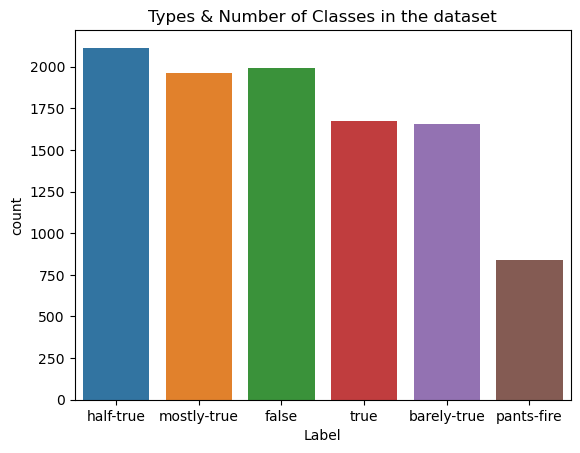

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Label',data=df)
plt.title('Types & Number of Classes in the dataset')

## Data Preprocessing

### Dataset Cleaning

In [4]:
import re
import string
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

# Removing HTML tags
def remove_html(text):
    return BeautifulSoup(text, "html.parser").get_text()

# Removing punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Removing stop words
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])

# Applying the cleaning functions
df['Cleaned Statement'] = df['Statement'].apply(remove_html).apply(remove_punctuation).apply(remove_stopwords)

# Displaying the cleaned text
print(df[['Statement', 'Cleaned Statement']].head())


C:\Users\KHADIJA ALTAF\AppData\Local\Temp\ipykernel_5444\2848320065.py:8: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()


                                           Statement  \
0  When did the decline of coal start? It started...   
1  Hillary Clinton agrees with John McCain "by vo...   
2  Health care reform legislation is likely to ma...   
3  The economic turnaround started at the end of ...   
4  The Chicago Bears have had more starting quart...   

                                   Cleaned Statement  
0  decline coal start started natural gas took st...  
1  Hillary Clinton agrees John McCain voting give...  
2  Health care reform legislation likely mandate ...  
3               economic turnaround started end term  
4  Chicago Bears starting quarterbacks last 10 ye...  


### Text Tokenization 

In [5]:
from nltk.tokenize import word_tokenize

# Tokenizing the text
df['Tokenized Statement'] = df['Cleaned Statement'].apply(word_tokenize)

# Displaying the tokenized text
print(df[['Cleaned Statement', 'Tokenized Statement']].head())

                                   Cleaned Statement  \
0  decline coal start started natural gas took st...   
1  Hillary Clinton agrees John McCain voting give...   
2  Health care reform legislation likely mandate ...   
3               economic turnaround started end term   
4  Chicago Bears starting quarterbacks last 10 ye...   

                                 Tokenized Statement  
0  [decline, coal, start, started, natural, gas, ...  
1  [Hillary, Clinton, agrees, John, McCain, votin...  
2  [Health, care, reform, legislation, likely, ma...  
3         [economic, turnaround, started, end, term]  
4  [Chicago, Bears, starting, quarterbacks, last,...  


### Lemmatization

In [6]:
from nltk.stem import WordNetLemmatizer

# Initializing the lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatizing the tokens
df['Lemmatized Statement'] = df['Tokenized Statement'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Displaying the lemmatized text
print(df[['Tokenized Statement', 'Lemmatized Statement']].head())

                                 Tokenized Statement  \
0  [decline, coal, start, started, natural, gas, ...   
1  [Hillary, Clinton, agrees, John, McCain, votin...   
2  [Health, care, reform, legislation, likely, ma...   
3         [economic, turnaround, started, end, term]   
4  [Chicago, Bears, starting, quarterbacks, last,...   

                                Lemmatized Statement  
0  [decline, coal, start, started, natural, gas, ...  
1  [Hillary, Clinton, agrees, John, McCain, votin...  
2  [Health, care, reform, legislation, likely, ma...  
3         [economic, turnaround, started, end, term]  
4  [Chicago, Bears, starting, quarterback, last, ...  


### Handling Missing Values

In [7]:
# Checking for missing values
print(df.isnull().sum())

# Handling missing values 
df.dropna(subset=['Label'], inplace=True)

# Displaying the DataFrame after handling missing values
print(df.head())


ID                         0
Label                      0
Statement                  0
Subject                    2
Speaker                    2
Job Title               2898
State                   2210
Party                      2
Barely True Counts         2
False Counts               2
Half True Counts           2
Mostly True Counts         2
Pants on Fire Counts       2
Context                  102
Cleaned Statement          0
Tokenized Statement        0
Lemmatized Statement       0
dtype: int64
           ID        Label                                          Statement  \
0  10540.json    half-true  When did the decline of coal start? It started...   
1    324.json  mostly-true  Hillary Clinton agrees with John McCain "by vo...   
2   1123.json        false  Health care reform legislation is likely to ma...   
3   9028.json    half-true  The economic turnaround started at the end of ...   
4  12465.json         true  The Chicago Bears have had more starting quart...   

       

## Feature Extraction

### TF-IDF Vectorization

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combining lemmatized tokens back into sentences for TF-IDF
df['Lemmatized Statement'] = df['Lemmatized Statement'].apply(lambda x: ' '.join(x))

# Initializing the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000) 

# Fitting and transforming the data
tfidf_features = tfidf_vectorizer.fit_transform(df['Lemmatized Statement'])

# Converting to DataFrame for easier handling
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Displaying the TF-IDF features DataFrame
print(tfidf_df.head())


         10  100  1000  10000  100000  1010  103  105  107  10th  ...  youll  \
0  0.000000  0.0   0.0    0.0     0.0   0.0  0.0  0.0  0.0   0.0  ...    0.0   
1  0.000000  0.0   0.0    0.0     0.0   0.0  0.0  0.0  0.0   0.0  ...    0.0   
2  0.000000  0.0   0.0    0.0     0.0   0.0  0.0  0.0  0.0   0.0  ...    0.0   
3  0.000000  0.0   0.0    0.0     0.0   0.0  0.0  0.0  0.0   0.0  ...    0.0   
4  0.210297  0.0   0.0    0.0     0.0   0.0  0.0  0.0  0.0   0.0  ...    0.0   

   young  younger  youre  youth  youve  zero  zika  zip  zone  
0    0.0      0.0    0.0    0.0    0.0   0.0   0.0  0.0   0.0  
1    0.0      0.0    0.0    0.0    0.0   0.0   0.0  0.0   0.0  
2    0.0      0.0    0.0    0.0    0.0   0.0   0.0  0.0   0.0  
3    0.0      0.0    0.0    0.0    0.0   0.0   0.0  0.0   0.0  
4    0.0      0.0    0.0    0.0    0.0   0.0   0.0  0.0   0.0  

[5 rows x 5000 columns]


In [9]:
# Identifying columns that contain numbers
columns_to_remove = [col for col in tfidf_df.columns if any(char.isdigit() for char in col)]

# Removing those columns
tfidf_df = tfidf_df.drop(columns=columns_to_remove)

# Displaying the TF-IDF features DataFrame after removing numeric columns
print("TF-IDF features after removing numeric columns:")
print(tfidf_df.head())

TF-IDF features after removing numeric columns:
   aaa  aarp  abbott  abele  ability  able  ablebodied  abolish  abolishing  \
0  0.0   0.0     0.0    0.0      0.0   0.0         0.0      0.0         0.0   
1  0.0   0.0     0.0    0.0      0.0   0.0         0.0      0.0         0.0   
2  0.0   0.0     0.0    0.0      0.0   0.0         0.0      0.0         0.0   
3  0.0   0.0     0.0    0.0      0.0   0.0         0.0      0.0         0.0   
4  0.0   0.0     0.0    0.0      0.0   0.0         0.0      0.0         0.0   

   aborted  ...  youll  young  younger  youre  youth  youve  zero  zika  zip  \
0      0.0  ...    0.0    0.0      0.0    0.0    0.0    0.0   0.0   0.0  0.0   
1      0.0  ...    0.0    0.0      0.0    0.0    0.0    0.0   0.0   0.0  0.0   
2      0.0  ...    0.0    0.0      0.0    0.0    0.0    0.0   0.0   0.0  0.0   
3      0.0  ...    0.0    0.0      0.0    0.0    0.0    0.0   0.0   0.0  0.0   
4      0.0  ...    0.0    0.0      0.0    0.0    0.0    0.0   0.0   0.0  0.0 

### Word Embeddings 

#### Word2Vec

In [10]:
from gensim.models import Word2Vec
import numpy as np

sentences = df['Tokenized Statement'].tolist()

# Initializing and training the Word2Vec model
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Getting the average word vectors for each statement
def get_average_word2vec(tokens, model, vocabulary, vector_size=100):
    if len(tokens) < 1:
        return np.zeros(vector_size)
    vector = [model.wv[token] for token in tokens if token in vocabulary]
    if len(vector) == 0:
        return np.zeros(vector_size)
    return np.mean(vector, axis=0)

# Applying to the dataset
df['Word2Vec'] = df['Tokenized Statement'].apply(lambda x: get_average_word2vec(x, word2vec_model, word2vec_model.wv.key_to_index))

# Displaying the Word2Vec features
print(df[['Statement', 'Word2Vec']].head())


                                           Statement  \
0  When did the decline of coal start? It started...   
1  Hillary Clinton agrees with John McCain "by vo...   
2  Health care reform legislation is likely to ma...   
3  The economic turnaround started at the end of ...   
4  The Chicago Bears have had more starting quart...   

                                            Word2Vec  
0  [-0.051963914, 0.3797753, 0.08169893, -0.00930...  
1  [-0.06423715, 0.4373176, 0.075628944, -0.02415...  
2  [-0.049561284, 0.26100427, 0.1337493, -0.04137...  
3  [-0.059309352, 0.26170838, 0.042642437, -0.009...  
4  [-0.10176996, 0.31525505, 0.049275473, -0.0191...  


In [11]:
X = np.array(df['Word2Vec'].tolist())
y = df['Label'].values


In [12]:
from sklearn.model_selection import train_test_split

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Logistic Regression with Word2Vec

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initializing Logistic Regression model
lr_model = LogisticRegression()

# Training the model
lr_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluating the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.23095703125
Logistic Regression Classification Report:
               precision    recall  f1-score   support

 barely-true       0.18      0.01      0.02       331
       false       0.22      0.45      0.29       399
   half-true       0.21      0.33      0.26       424
 mostly-true       0.28      0.36      0.31       410
  pants-fire       0.75      0.02      0.04       158
        true       0.00      0.00      0.00       326

    accuracy                           0.23      2048
   macro avg       0.27      0.19      0.15      2048
weighted avg       0.23      0.23      0.18      2048

Logistic Regression Confusion Matrix:
 [[  4 150 110  66   1   0]
 [  4 178 139  78   0   0]
 [  6 170 141 106   0   1]
 [  2 131 130 147   0   0]
 [  2  83  45  25   3   0]
 [  4 112 100 110   0   0]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### GloVe

In [14]:
import gensim.downloader as api

# Loading pre-trained GloVe model from gensim-data
glove_model = api.load("glove-wiki-gigaword-100")

# Getting the average word vectors for each statement
def get_average_glove(tokens, model, vector_size=100):
    if len(tokens) < 1:
        return np.zeros(vector_size)
    vector = [model[token] for token in tokens if token in model]
    if len(vector) == 0:
        return np.zeros(vector_size)
    return np.mean(vector, axis=0)

# Applying to the dataset
df['GloVe'] = df['Tokenized Statement'].apply(lambda x: get_average_glove(x, glove_model))

# Displaying the GloVe features
print(df[['Statement', 'GloVe']].head())


                                           Statement  \
0  When did the decline of coal start? It started...   
1  Hillary Clinton agrees with John McCain "by vo...   
2  Health care reform legislation is likely to ma...   
3  The economic turnaround started at the end of ...   
4  The Chicago Bears have had more starting quart...   

                                               GloVe  
0  [0.34565985, 0.2739913, -0.027594399, 0.048459...  
1  [0.019761378, 0.455904, 0.398898, 0.0004660010...  
2  [-0.034272537, 0.23915458, 0.09827667, -0.1513...  
3  [0.173148, 0.023954201, 0.05200799, -0.0992726...  
4  [0.10136685, 0.256962, 0.09606998, -0.15193236...  


In [15]:
X = np.array(df['GloVe'].tolist())  # Convert GloVe features to a numpy array
y = df['Label'].values  # Extract target labels


In [16]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression with GloVe

In [17]:
# Initializing the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)  # max_iter increased to ensure convergence

# Training the model
lr_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluating the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.23095703125
Logistic Regression Classification Report:
               precision    recall  f1-score   support

 barely-true       0.22      0.12      0.16       331
       false       0.24      0.31      0.27       399
   half-true       0.21      0.29      0.25       424
 mostly-true       0.26      0.31      0.28       410
  pants-fire       0.07      0.02      0.03       158
        true       0.24      0.17      0.20       326

    accuracy                           0.23      2048
   macro avg       0.21      0.20      0.20      2048
weighted avg       0.22      0.23      0.22      2048

Logistic Regression Confusion Matrix:
 [[ 40  89  98  69  10  25]
 [ 36 125 114  71  10  43]
 [ 39 111 124  98   9  43]
 [ 29  79 119 127  10  46]
 [ 24  60  41  18   3  12]
 [ 15  64  82 108   3  54]]


## Logistic Regression with TF-IDF

In [18]:
#Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, df['Label'], test_size=0.2, random_state=42)
print(len(X_train),len(X_test))
print(len(y_train), len(y_test))

8191 2048
8191 2048


In [19]:
#Training the Logistic Regression Model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

LogisticRegression()

In [20]:
#Evaluating the Model
y_pred = logistic_regression_model.predict(X_test)
print("Logistic Regression Model")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Logistic Regression Model
Accuracy: 0.240234375
              precision    recall  f1-score   support

 barely-true       0.22      0.17      0.19       331
       false       0.23      0.30      0.26       399
   half-true       0.24      0.31      0.27       424
 mostly-true       0.26      0.29      0.27       410
  pants-fire       0.27      0.05      0.09       158
        true       0.23      0.19      0.21       326

    accuracy                           0.24      2048
   macro avg       0.24      0.22      0.21      2048
weighted avg       0.24      0.24      0.23      2048

[[ 56  87  80  64   4  40]
 [ 56 118 103  66   7  49]
 [ 50  99 131  93   6  45]
 [ 46  76 106 117   3  62]
 [ 16  58  38  22   8  16]
 [ 32  66  78  86   2  62]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

## Support Vector Machines (SVM) with TF-IDF

In [21]:
#Importing Required Libraries
from sklearn.svm import SVC

#Training the SVM Model
svm_model = SVC()
svm_model.fit(X_train, y_train)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

SVC()

In [22]:
#Evaluating the Model
y_pred = svm_model.predict(X_test)
print("SVM Model")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


SVM Model
Accuracy: 0.2470703125
              precision    recall  f1-score   support

 barely-true       0.21      0.09      0.12       331
       false       0.26      0.42      0.32       399
   half-true       0.23      0.35      0.28       424
 mostly-true       0.26      0.29      0.27       410
  pants-fire       0.00      0.00      0.00       158
        true       0.25      0.13      0.17       326

    accuracy                           0.25      2048
   macro avg       0.20      0.21      0.19      2048
weighted avg       0.23      0.25      0.22      2048

[[ 29 110 104  64   0  24]
 [ 30 168 116  61   0  24]
 [ 29 122 150  96   0  27]
 [ 23  98 129 117   0  43]
 [ 11  75  47  18   0   7]
 [ 14  75 105  90   0  42]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

## Random Forest with TF-IDF

In [23]:
#Importing Required Libraries
from sklearn.ensemble import RandomForestClassifier

#Training the Random Forest Model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

RandomForestClassifier()

In [24]:
#Evaluating the Model
y_pred = random_forest_model.predict(X_test)
print("Random Forest Model")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Random Forest Model
Accuracy: 0.2490234375
              precision    recall  f1-score   support

 barely-true       0.28      0.15      0.19       331
       false       0.24      0.42      0.30       399
   half-true       0.25      0.30      0.28       424
 mostly-true       0.25      0.27      0.26       410
  pants-fire       0.32      0.08      0.12       158
        true       0.23      0.14      0.17       326

    accuracy                           0.25      2048
   macro avg       0.26      0.22      0.22      2048
weighted avg       0.26      0.25      0.24      2048

[[ 49 108  80  59   5  30]
 [ 42 166  84  68   9  30]
 [ 26 130 129  97   4  38]
 [ 32 120 103 109   3  43]
 [  8  72  39  21  12   6]
 [ 21  96  78  82   4  45]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

## Binary Class Dataset

In [25]:
# Importing the dataset
train = pd.read_csv("C:\\Users\\KHADIJA ALTAF\\Downloads\\liar_dataset\\train.tsv", sep='\t', quoting=3, header=None)
test = pd.read_csv("C:\\Users\\KHADIJA ALTAF\\Downloads\\liar_dataset\\test.tsv", sep='\t', quoting=3, header=None)
valid = pd.read_csv("C:\\Users\\KHADIJA ALTAF\\Downloads\\liar_dataset\\valid.tsv", sep='\t', quoting=3, header=None)

df_raw = pd.concat([train, test, valid], axis=0, sort=False)
df_raw = df_raw.sample(frac=1).reset_index()

# naming the columns of the dataset
df_raw.columns=["index","ID", "label", "statement", "subject", "speaker", "job", "state", "party", "barely_true_cts",
        "false_cts", "half_true_cts", "mostly_true_cts", "pants_on_fire_cts", "context"]

In [26]:
#function for mapping labels "true, mostly-true, half-true" to TRUE and "false, barely-true, pants-fire" to FAKE.
def binary_class_dataset(data):
    
    data = data.iloc[:, [2, 3]]
    data.columns = ['label', 'statement']
    Original_labels = {
        'true': 'True',
        'mostly-true': 'True',
        'half-true': 'True',
        'false': 'Fake',
        'barely-true': 'Fake',
        'pants-fire': 'Fake'
    }
    data['label'] = data['label'].map(Original_labels)

    return data

#### Data Preprocessing

In [27]:
# Applying the binary class mapping
df_raw = binary_class_dataset(df_raw)

# Cleaning text functions
def remove_html(text):
    return BeautifulSoup(text, "html.parser").get_text()

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])

# Applying text cleaning
df_raw['Cleaned Statement'] = df_raw['statement'].apply(remove_html).apply(remove_punctuation).apply(remove_stopwords)

# Tokenizing the text
df_raw['Tokenized Statement'] = df_raw['Cleaned Statement'].apply(word_tokenize)

# Initializing the lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatizing the tokens
df_raw['Lemmatized Statement'] = df_raw['Tokenized Statement'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Combining lemmatized tokens back into sentences for TF-IDF
df_raw['Lemmatized Statement'] = df_raw['Lemmatized Statement'].apply(lambda x: ' '.join(x))



C:\Users\KHADIJA ALTAF\AppData\Local\Temp\ipykernel_5444\440764115.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data['label'].map(Original_labels)
C:\Users\KHADIJA ALTAF\AppData\Local\Temp\ipykernel_5444\3437085678.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()


### TF-IDF for Binary Class Dataset

In [28]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_features = tfidf_vectorizer.fit_transform(df_raw['Lemmatized Statement'])

# Converting to DataFrame for easier handling
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Removing numeric columns
columns_to_remove = [col for col in tfidf_df.columns if any(char.isdigit() for char in col)]
tfidf_df = tfidf_df.drop(columns=columns_to_remove)



### Word2Vec for Binary Class Dataset

In [29]:
# Word2Vec Model
sentences = df_raw['Tokenized Statement'].tolist()
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

def get_average_word2vec(tokens, model, vocabulary, vector_size=100):
    if len(tokens) < 1:
        return np.zeros(vector_size)
    vector = [model.wv[token] for token in tokens if token in vocabulary]
    if len(vector) == 0:
        return np.zeros(vector_size)
    return np.mean(vector, axis=0)

df_raw['Word2Vec'] = df_raw['Tokenized Statement'].apply(lambda x: get_average_word2vec(x, word2vec_model, word2vec_model.wv.key_to_index))
print(df_raw[['Tokenized Statement', 'Word2Vec']].head())

# GloVe Model
glove_model = api.load("glove-wiki-gigaword-100")

def get_average_glove(tokens, model, vector_size=100):
    if len(tokens) < 1:
        return np.zeros(vector_size)
    vector = [model[token] for token in tokens if token in model]
    if len(vector) == 0:
        return np.zeros(vector_size)
    return np.mean(vector, axis=0)

df_raw['GloVe'] = df_raw['Tokenized Statement'].apply(lambda x: get_average_glove(x, glove_model))
print(df[['Tokenized Statement', 'GloVe']].head())


                                 Tokenized Statement  \
0  [Says, Romney, Ryan, backed, proposals, would,...   
1       [Mitt, Romney, said, tragic, end, war, Iraq]   
2  [Says, restoring, Georgia, prek, 180day, progr...   
3  [Says, President, Obamas, decision, issue, per...   
4                   [fought, 38, Studios, beginning]   

                                            Word2Vec  
0  [-0.15666133, 0.4939266, 0.11884161, 0.0241634...  
1  [-0.1745796, 0.64074814, 0.11641986, 0.0117894...  
2  [-0.16402027, 0.46139273, 0.09388253, 0.038785...  
3  [-0.10337238, 0.4108081, 0.043846197, -0.03450...  
4  [-0.05830028, 0.15691206, 0.034770146, 0.01670...  
                                 Tokenized Statement  \
0  [decline, coal, start, started, natural, gas, ...   
1  [Hillary, Clinton, agrees, John, McCain, votin...   
2  [Health, care, reform, legislation, likely, ma...   
3         [economic, turnaround, started, end, term]   
4  [Chicago, Bears, starting, quarterbacks, last,... 

In [30]:
X = np.array(df_raw['Word2Vec'].tolist())
y = df_raw['label'].values

In [31]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Logistic Regression with Word2Vec for Binary Class Dataset

In [32]:
# Initializing Logistic Regression model
lr_model = LogisticRegression()

# Training the model
lr_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluating the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.5837227414330218
Logistic Regression Classification Report:
               precision    recall  f1-score   support

        Fake       0.53      0.32      0.40      1111
        True       0.60      0.78      0.68      1457

    accuracy                           0.58      2568
   macro avg       0.57      0.55      0.54      2568
weighted avg       0.57      0.58      0.56      2568

Logistic Regression Confusion Matrix:
 [[ 361  750]
 [ 319 1138]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## SVM with Word2Vec for Binary Class Dataset

In [33]:
# Initializing SVM model
svm_model = SVC()

# Training the model
svm_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluating the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM Accuracy: 0.5845015576323987
SVM Classification Report:
               precision    recall  f1-score   support

        Fake       0.56      0.18      0.27      1111
        True       0.59      0.89      0.71      1457

    accuracy                           0.58      2568
   macro avg       0.58      0.54      0.49      2568
weighted avg       0.58      0.58      0.52      2568

SVM Confusion Matrix:
 [[ 199  912]
 [ 155 1302]]


## Random Forest with Word2Vec for Binary Class Dataset

In [34]:
# Initializing Random Forest model
rf_model = RandomForestClassifier()

# Training the model
rf_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluating the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.5681464174454829
Random Forest Classification Report:
               precision    recall  f1-score   support

        Fake       0.50      0.45      0.47      1111
        True       0.61      0.66      0.63      1457

    accuracy                           0.57      2568
   macro avg       0.56      0.55      0.55      2568
weighted avg       0.56      0.57      0.56      2568

Random Forest Confusion Matrix:
 [[495 616]
 [493 964]]


## GloVe for Binary Class Dataset

In [35]:
X = np.array(df_raw['GloVe'].tolist())  # Convert GloVe features to a numpy array
y = df_raw['label'].values  # Extract target labels


In [36]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Logistic Regression with GloVe

In [37]:
# Initializing the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)  # max_iter increased to ensure convergence

# Training the model
lr_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluating the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.5903426791277259
Logistic Regression Classification Report:
               precision    recall  f1-score   support

        Fake       0.54      0.40      0.46      1111
        True       0.62      0.74      0.67      1457

    accuracy                           0.59      2568
   macro avg       0.58      0.57      0.56      2568
weighted avg       0.58      0.59      0.58      2568

Logistic Regression Confusion Matrix:
 [[ 441  670]
 [ 382 1075]]


### SVM with GloVe

In [38]:
# Initializing the SVM model
svm_model = SVC()

# Training the model
svm_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluating the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM Accuracy: 0.6016355140186916
SVM Classification Report:
               precision    recall  f1-score   support

        Fake       0.56      0.35      0.43      1111
        True       0.62      0.79      0.69      1457

    accuracy                           0.60      2568
   macro avg       0.59      0.57      0.56      2568
weighted avg       0.59      0.60      0.58      2568

SVM Confusion Matrix:
 [[ 389  722]
 [ 301 1156]]


### Random Forest with GloVe

In [39]:
# Initializing the Random Forest model
rf_model = RandomForestClassifier()

# Training the model
rf_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluating the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.594626168224299
Random Forest Classification Report:
               precision    recall  f1-score   support

        Fake       0.54      0.44      0.48      1111
        True       0.63      0.71      0.67      1457

    accuracy                           0.59      2568
   macro avg       0.58      0.58      0.58      2568
weighted avg       0.59      0.59      0.59      2568

Random Forest Confusion Matrix:
 [[ 489  622]
 [ 419 1038]]


### Hyperparameter Tuning for Random Forest

In [40]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initializing GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Training on the training set
grid_search_rf.fit(X_train, y_train)

# Best parameters and score
print("Best parameters found by GridSearchCV:", grid_search_rf.best_params_)
print("Best cross-validation score:", grid_search_rf.best_score_)

# Predicting on the test set with the best estimator
y_pred_best_rf = grid_search_rf.best_estimator_.predict(X_test)

# Evaluating the tuned model
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Tuned Random Forest Classification Report:\n", classification_report(y_test, y_pred_best_rf))
print("Tuned Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found by GridSearchCV: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation score: 0.6012849042236658
Tuned Random Forest Accuracy: 0.6043613707165109
Tuned Random Forest Classification Report:
               precision    recall  f1-score   support

        Fake       0.56      0.41      0.47      1111
        True       0.63      0.76      0.68      1457

    accuracy                           0.60      2568
   macro avg       0.59      0.58      0.58      2568
weighted avg       0.60      0.60      0.59      2568

Tuned Random Forest Confusion Matrix:
 [[ 451  660]
 [ 356 1101]]


In [41]:
# Model Training and Evaluation
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, df_raw['label'], test_size=0.2, random_state=42)

### Logistic Regression with TF-IDF

In [42]:
# Logistic Regression Model
logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(X_train, y_train)
y_pred = logistic_regression_model.predict(X_test)
print("Logistic Regression Model")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

Logistic Regression Model
Accuracy: 0.6117601246105919


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

              precision    recall  f1-score   support

        Fake       0.56      0.45      0.50      1111
        True       0.64      0.73      0.68      1457

    accuracy                           0.61      2568
   macro avg       0.60      0.59      0.59      2568
weighted avg       0.61      0.61      0.60      2568

[[ 502  609]
 [ 388 1069]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

### SVM with TF-IDF

In [43]:
# SVM Model
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print("SVM Model")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

SVM Model
Accuracy: 0.6218847352024922


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

              precision    recall  f1-score   support

        Fake       0.58      0.45      0.51      1111
        True       0.64      0.76      0.69      1457

    accuracy                           0.62      2568
   macro avg       0.61      0.60      0.60      2568
weighted avg       0.62      0.62      0.61      2568

[[ 496  615]
 [ 356 1101]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

### Random Forest with TF-IDF

In [44]:
# Random Forest Model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)
print("Random Forest Model")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

Random Forest Model
Accuracy: 0.6113707165109035


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

              precision    recall  f1-score   support

        Fake       0.56      0.48      0.52      1111
        True       0.64      0.71      0.67      1457

    accuracy                           0.61      2568
   macro avg       0.60      0.60      0.60      2568
weighted avg       0.61      0.61      0.61      2568

[[ 535  576]
 [ 422 1035]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

## CountVectorizer: Bag of Words

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
print(df_raw.head())


  label                                          statement  \
0  True  Says Romney and Ryan both backed proposals tha...   
1  True  Mitt Romney said it was tragic to end the war ...   
2  True  Says restoring Georgia pre-k to a 180-day prog...   
3  Fake  Says President Obamas decision to not issue a ...   
4  Fake            I fought 38 Studios from the beginning.   

                                   Cleaned Statement  \
0  Says Romney Ryan backed proposals would outlaw...   
1               Mitt Romney said tragic end war Iraq   
2  Says restoring Georgia prek 180day program rea...   
3  Says President Obamas decision issue permit Ke...   
4                        fought 38 Studios beginning   

                                 Tokenized Statement  \
0  [Says, Romney, Ryan, backed, proposals, would,...   
1       [Mitt, Romney, said, tragic, end, war, Iraq]   
2  [Says, restoring, Georgia, prek, 180day, progr...   
3  [Says, President, Obamas, decision, issue, per...   
4         

In [47]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_raw['Lemmatized Statement'], df_raw['label'], test_size=0.2, random_state=42)


In [48]:
# Initializing the CountVectorizer
vectorizer = CountVectorizer()

# Fitting and transforming the training data to BoW
X_train_bow = vectorizer.fit_transform(X_train)

# Transforming the testing data to BoW
X_test_bow = vectorizer.transform(X_test)


## Logistic Regression with BoW for Binary Class Dataset

In [49]:
# Initializing Logistic Regression model
lr_model = LogisticRegression()

# Training the model
lr_model.fit(X_train_bow, y_train)

# Predicting on the test set
y_pred_lr = lr_model.predict(X_test_bow)

# Evaluating the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Accuracy: 0.5942367601246106
Logistic Regression Classification Report:
               precision    recall  f1-score   support

        Fake       0.53      0.50      0.51      1111
        True       0.64      0.67      0.65      1457

    accuracy                           0.59      2568
   macro avg       0.58      0.58      0.58      2568
weighted avg       0.59      0.59      0.59      2568

Logistic Regression Confusion Matrix:
 [[553 558]
 [484 973]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

## SVM with BoW for Binary Class Dataset

In [50]:
# Initializing SVM model
svm_model = SVC()

# Training the model
svm_model.fit(X_train_bow, y_train)

# Predicting on the test set
y_pred_svm = svm_model.predict(X_test_bow)

# Evaluating the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

SVM Accuracy: 0.6222741433021807
SVM Classification Report:
               precision    recall  f1-score   support

        Fake       0.58      0.46      0.51      1111
        True       0.64      0.75      0.69      1457

    accuracy                           0.62      2568
   macro avg       0.61      0.60      0.60      2568
weighted avg       0.62      0.62      0.61      2568

SVM Confusion Matrix:
 [[ 506  605]
 [ 365 1092]]


## Random Forest with BoW for Binary Class Dataset

In [51]:
# Initializing Random Forest model
rf_model = RandomForestClassifier()

# Training the model
rf_model.fit(X_train_bow, y_train)

# Predicting on the test set
y_pred_rf = rf_model.predict(X_test_bow)

# Evaluating the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

Random Forest Accuracy: 0.6164330218068536
Random Forest Classification Report:
               precision    recall  f1-score   support

        Fake       0.56      0.50      0.53      1111
        True       0.65      0.71      0.68      1457

    accuracy                           0.62      2568
   macro avg       0.61      0.60      0.60      2568
weighted avg       0.61      0.62      0.61      2568

Random Forest Confusion Matrix:
 [[ 552  559]
 [ 426 1031]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

## RNN Model

In [52]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Setting the maximum number of words to keep in the tokenizer and max sequence length
max_words = 10000
max_len = 100

# Tokenizing the text data
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df_raw['statement'])
sequences = tokenizer.texts_to_sequences(df_raw['statement'])

# Padding sequences to ensure uniform length
padded_sequences = pad_sequences(sequences, maxlen=max_len)


In [53]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df_raw['label'], test_size=0.2, random_state=42)


In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Hyperparameters
max_words = 10000  # Number of unique words in the vocabulary
max_len = 100  # Maximum length of input sequences
embedding_dim = 100  # Size of word vectors
rnn_units = 64  # Number of units in the RNN layer

# Defining the model
model = Sequential()

# Embedding layer: input_dim is the vocabulary size, output_dim is the size of the embedding vectors, 
# input_length is the length of the input sequences
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))

# Simple RNN layer
model.add(SimpleRNN(rnn_units))

# Dense layer for output
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Printing the model summary
model.summary()


C:\Users\KHADIJA ALTAF\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)